In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
X, y = make_moons(100, noise=0.25,random_state=2)

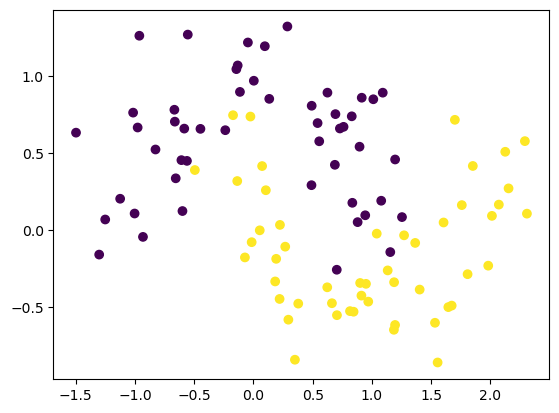

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [5]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

C:\Users\kapil\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Set parameters to 0
model.get_weights()

[array([[ 0.65303606, -0.4030788 ,  0.56798655, -0.6464043 , -0.5791309 ,
         -0.47451046, -0.18853468,  0.24669796,  0.22621983,  0.0517413 ],
        [-0.28855738,  0.46888298, -0.69067323,  0.1401568 ,  0.3769427 ,
          0.21241301,  0.689393  ,  0.10134125,  0.29367667,  0.34739035]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.6064236 ],
        [ 0.22135597],
        [-0.07837522],
        [-0.08881825],
        [-0.03397626],
        [-0.696709  ],
        [ 0.63210136],
        [-0.37547737],
        [-0.04018515],
        [-0.46675092]], dtype=float32),
 array([0.], dtype=float32)]

In [7]:
initial_weights = model.get_weights()

initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [8]:
model.set_weights(initial_weights)

In [9]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.3500 - val_loss: 0.6951
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5539 - loss: 0.6925 - val_accuracy: 0.3500 - val_loss: 0.6963
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5422 - loss: 0.6920 - val_accuracy: 0.3500 - val_loss: 0.6973
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5227 - loss: 0.6926 - val_accuracy: 0.3500 - val_loss: 0.6983
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5227 - loss: 0.6921 - val_accuracy: 0.3500 - val_loss: 0.6994
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5031 - loss: 0.6925 - val_accuracy: 0.3500 - val_loss: 0.7006
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5461 - loss: 0.6918 - val_accuracy: 0.3500 - val_loss: 0.7019
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5109 - loss: 0.6919 - val_accuracy: 0.3500 - val_loss:

Epoch 52/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5461 - loss: 0.6827 - val_accuracy: 0.3500 - val_loss: 0.7224
Epoch 53/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5852 - loss: 0.6763 - val_accuracy: 0.3500 - val_loss: 0.7226
Epoch 54/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5383 - loss: 0.6815 - val_accuracy: 0.3500 - val_loss: 0.7225
Epoch 55/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5461 - loss: 0.6818 - val_accuracy: 0.3500 - val_loss: 0.7226
Epoch 56/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5344 - loss: 0.6857 - val_accuracy: 0.3500 - val_loss: 0.7226
Epoch 57/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5578 - loss: 0.6809 - val_accuracy: 0.3500 - val_loss: 0.7225
Epoch 58/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5500 - loss: 0.6821 - val_accuracy: 0.3500 - val_loss: 0.7224
Epoch 59/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5383 - loss: 0.6805 - val_accuracy: 0.3500 - v

In [12]:
model.get_weights()

[array([[ 0.3727219,  0.3727219,  0.3727219,  0.3727219,  0.3727219,
          0.3727219,  0.3727219,  0.3727219,  0.3727219,  0.3727219],
        [-0.4115909, -0.4115909, -0.4115909, -0.4115909, -0.4115909,
         -0.4115909, -0.4115909, -0.4115909, -0.4115909, -0.4115909]],
       dtype=float32),
 array([-0.06807375, -0.06807375, -0.06807375, -0.06807375, -0.06807375,
        -0.06807375, -0.06807375, -0.06807375, -0.06807376, -0.06807376],
       dtype=float32),
 array([[0.07043719],
        [0.07043719],
        [0.07043719],
        [0.07043719],
        [0.07043719],
        [0.07043719],
        [0.07043719],
        [0.07043719],
        [0.07043719],
        [0.07043719]], dtype=float32),
 array([-0.03154081], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 519us/step


<Axes: >

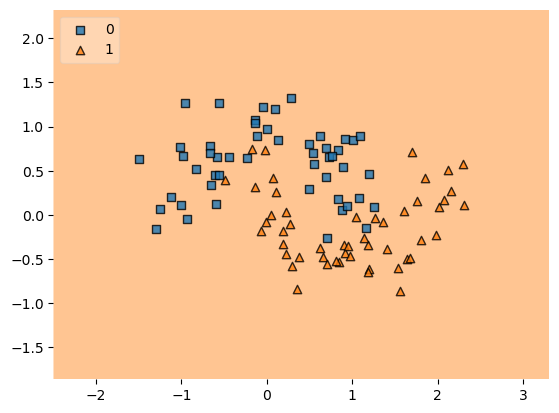

In [13]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)